In [1]:
from constants import GRADUATES_DIR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
graduates = pd.read_csv(
    GRADUATES_DIR,
    encoding="ISO-8859-1",
    sep=";",
    decimal=".",
    skiprows=4,
    skipfooter=3,
    index_col=[0, 1],
    engine="python")
graduates

Bundesländer     Bundesländer.1  \
NaN       NaN      Baden-Württemberg  Baden-Württemberg   
          NaN                Schüler      Schulanfänger   
          NaN                 Anzahl             Anzahl   
männlich  1997/98                  -                  -   
          1998/99             650777                  -   
...                              ...                ...   
Insgesamt 2018/19            1112617              98715   
          2019/20            1109593             100344   
          2020/21            1105831              98602   
          2021/22            1107856             100737   
          2022/23            1134191             104069   

                             Bundesländer.2 Bundesländer.3 Bundesländer.4  \
NaN       NaN             Baden-Württemberg         Bayern         Bayern   
          NaN      Absolventen und Abgänger        Schüler  Schulanfänger   
          NaN                        Anzahl         Anzahl         Anzahl   
männlich  1997/98                     58197              -              -   
          1998/99                     58589         718407              -   
...                                     ...            ...            ...   
Insgesamt 2018/19                    106380        1252674         114812   
          2019/20                    103660        1248686         113425   
          2020/21                     99696        1250730         114577   
          2021/22                    100186        1258628         120505   
          2022/23                         -        1298480         128843   

                             Bundesländer.5 Bundesländer.6 Bundesländer.7  \
NaN       NaN                        Bayern         Berlin         Berlin   
          NaN      Absolventen und Abgänger        Schüler  Schulanfänger   
          NaN                        Anzahl         Anzahl         Anzahl   
männlich  1997/98                     67510              -              -   
          1998/99                     66985         209748              -   
...                                     ...            ...            ...   
Insgesamt 2018/19                    129795         360031          33956   
          2019/20                    120561         365942          35041   
          2020/21                    120438         372686          35446   
          2021/22                    121815         379116          35660   
          2022/23                         -         391204          38010   

                             Bundesländer.8 Bundesländer.9  ...  \
NaN       NaN                        Berlin    Brandenburg  ...   
          NaN      Absolventen und Abgänger        Schüler  ...   
          NaN                        Anzahl         Anzahl  ...   
männlich  1997/98                     19257              -  ...   
          1998/99                     20102         189510  ...   
...                                     ...            ...  ...   
Insgesamt 2018/19                     31316         244294  ...   
          2019/20                     30737         247842  ...   
          2020/21                     31563         252317  ...   
          2021/22                     31093         256309  ...   
          2022/23                         -         267966  ...   

                            Bundesländer.38 Bundesländer.39 Bundesländer.40  \
NaN       NaN                       Sachsen  Sachsen-Anhalt  Sachsen-Anhalt   
          NaN      Absolventen und Abgänger         Schüler   Schulanfänger   
          NaN                        Anzahl          Anzahl          Anzahl   
männlich  1997/98                     29596               -               -   
          1998/99                     29975          179626               -   
...                                     ...             ...             ...   
Insgesamt 2018/19                     31726          195897           18300   
          2019/20           

In [5]:
schoolKids_BW = graduates.loc["Insgesamt", "Bundesländer"]
newToSchool_BW = graduates.loc["Insgesamt", "Bundesländer.1"]
graduates_BW = graduates.loc["Insgesamt", "Bundesländer.2"]

# Convert values to numeric
schoolKids_BW_numeric = pd.to_numeric(schoolKids_BW, errors="coerce")
newToSchool_BW_numeric = pd.to_numeric(newToSchool_BW, errors="coerce")
graduates_BW_numeric = pd.to_numeric(graduates_BW, errors="coerce")

/var/folders/2q/8m9rw8z54m1_j_22ptwp960h0000gn/T/ipykernel_9145/3559129588.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  schoolKids_BW = graduates.loc["Insgesamt", "Bundesländer"]
/var/folders/2q/8m9rw8z54m1_j_22ptwp960h0000gn/T/ipykernel_9145/3559129588.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  newToSchool_BW = graduates.loc["Insgesamt", "Bundesländer.1"]
/var/folders/2q/8m9rw8z54m1_j_22ptwp960h0000gn/T/ipykernel_9145/3559129588.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  graduates_BW = graduates.loc["Insgesamt", "Bundesländer.2"]


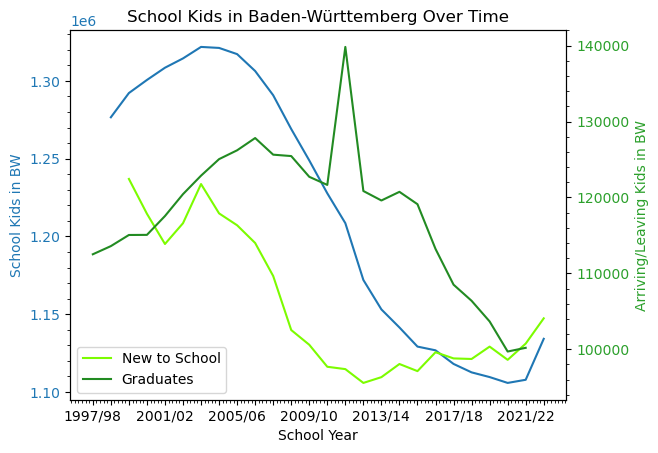

In [6]:
# Create a figure and the first axis
fig, ax1 = plt.subplots()
plt.minorticks_on()


# Plot the first series on the left y-axis
color = "tab:blue"
ax1.set_xlabel("School Year")
ax1.set_ylabel("School Kids in BW", color=color)
ax1.plot(schoolKids_BW_numeric.index, schoolKids_BW_numeric, color=color)
ax1.tick_params(axis="y", labelcolor=color)

# Create a second axis sharing the same x-axis
ax2 = ax1.twinx()
plt.minorticks_on()

# Plot the other data on the right y-axis
color = "tab:green"
ax2.set_ylabel("Arriving/Leaving Kids in BW", color=color)
(line1,) = ax2.plot(
    newToSchool_BW_numeric.index, newToSchool_BW_numeric, color="lawngreen"
)
(line2,) = ax2.plot(
    graduates_BW_numeric.index, graduates_BW_numeric, color="forestgreen"
)
ax2.tick_params(axis="y", labelcolor=color)

# Add a legend to ax2
ax2.legend([line1, line2], ["New to School", "Graduates"], loc="lower left")


# custom x-labels
sparseTickLabels = [
    "" if i % 4 != 0 else label for i, label in enumerate(newToSchool_BW_numeric.index)
]

plt.xticks(ticks=ax1.get_xticks(), labels=sparseTickLabels)


plt.title("School Kids in Baden-Württemberg Over Time")
plt.show()